In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  '#373e4b',
    "axes.facecolor": '#373e4b',
})

# Dataset

### $$X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & 1 \\ ... & ... & ... \\ x^{(m)}_1 & x^{(m)}_2 & 1 \end{bmatrix}$$
### $$y = \begin{bmatrix} y^{(1)}\\ \vdots \\y^{(m)} \end{bmatrix}$$

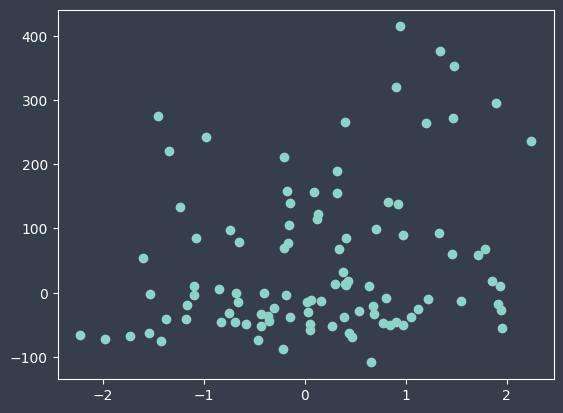

In [2]:
np.random.seed(0)

x, y = make_regression(n_samples=100, n_features=2, noise = 10) # creation d'un dataset (x, y) linéaire
y = y + abs(y/2) # modifie les valeurs de y pour rendre le dataset non-linéaire

plt.scatter(x[:,0], y) # afficher les résultats. x_1 en abscisse et y en ordonnée

In [3]:
# redimensionner y
y = y.reshape(y.shape[0], 1)
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


# Initialisation

### $$X = \begin{bmatrix} x^{(1)}_1 & x^{(1)}_2 & 1 \\ ... & ... & ... \\ x^{(m)}_1 & x^{(m)}_2 & 1 \end{bmatrix}$$
### $$\theta = \begin{bmatrix} a\\b\\c \end{bmatrix}$$

In [4]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])

(100, 3)
[[ 1.05445173 -1.07075262  1.        ]
 [-0.36274117 -0.63432209  1.        ]
 [-0.85409574  0.3130677   1.        ]
 [ 1.3263859   0.29823817  1.        ]
 [-0.4615846  -1.31590741  1.        ]
 [ 1.94362119 -1.17312341  1.        ]
 [-1.60205766  0.62523145  1.        ]
 [-0.40178094  0.17742614  1.        ]
 [-0.97727788  1.86755799  1.        ]
 [ 0.37816252  0.15494743  1.        ]]


In [5]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
theta = np.random.randn(3, 1)
theta

array([[-0.82646112],
       [ 0.78420863],
       [-0.1954172 ]])

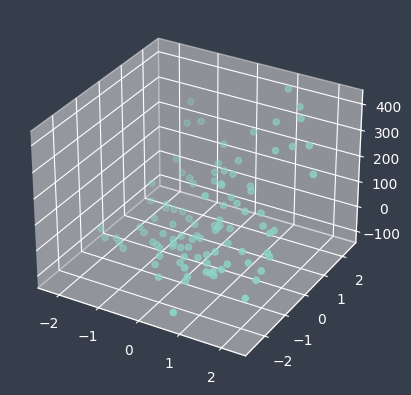

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)

# Modèle

### $$F = X.\theta$$

In [7]:
def model(X, theta):
    return X.dot(theta)

# Fonction Cout :  Erreur Quadratique moyenne

### $$ J(\theta) = \frac{1}{2m} \sum (X.\theta - y)^2 $$

In [8]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [9]:
cost_function(X, y, theta)

7692.90272386516

# Gradients

### $$\frac{\partial J(\theta) }{\partial \theta} = \frac{1}{m} X^T.(X.\theta - y)$$

In [10]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# Descente de Gradient

### $$\theta = \theta - \alpha \frac{\partial J(\theta) }{\partial \theta}$$

In [11]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations)
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

# Phase d'entraînement

In [12]:
n_iterations = 1000
learning_rate = 0.01

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [13]:
theta_final # Parametres du modèle une fois que la machine a été entrainée

array([[ 30.37280816],
       [105.01817361],
       [ 41.06906977]])

In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

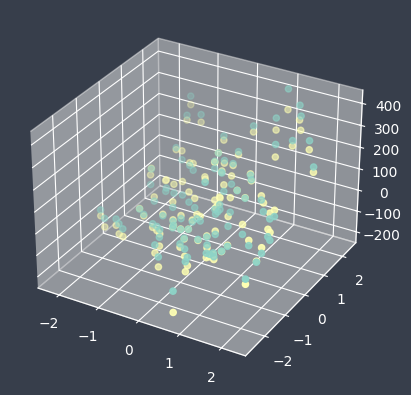

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:,0], x[:,1], y)
ax.scatter(x[:,0], x[:,1], predictions)

# Courbe d'apprentissage

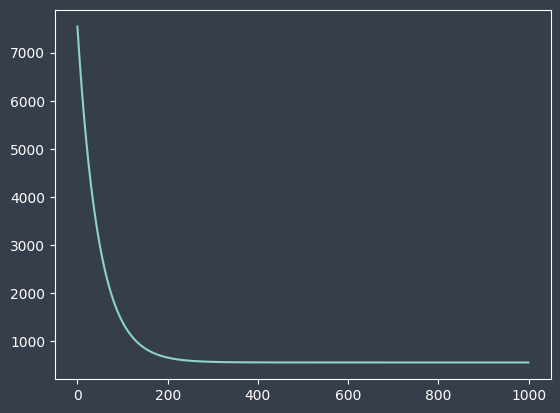

In [16]:
plt.plot(range(n_iterations), cost_history)

# Evaluation finale

### $${\displaystyle R^{2}=1-{\dfrac {\sum _{i=1}^{n}\left(y_{i}-{y_{i, \text{pred} }}\right)^{2}}{\sum _{i=1}^{n}\left(y_{i}-{\bar {y}}\right)^{2}}}}$$

In [17]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [18]:
coef_determination(y, predictions)

0.9169923948227143